<a href="https://colab.research.google.com/github/JenFaith/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Faith_LS_DS_132_Inference_For_Regression_Assignment_AG_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.

### Instructions

* **Download this notebook** as you would any other ipynb file
* **Upload** to Google Colab or work locally (if you have that set-up)
* **Delete `raise NotImplementedError()`**
* Write your code in the `# YOUR CODE HERE` space
* **Execute** the Test cells that contain `assert` statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)
* **Save** your notebook when you are finished
* **Download** as a `ipynb` file (if working in Colab)
* **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)

# Lambda School Data Science - Unit 1 Sprint 3 Module 2


### Learning Objectives

* identify the appropriate hypotheses to test for a statistically significant relationship between two quantitative variables
* conduct and interpret a t-test for the slope parameter
* identify the appropriate parts of the output of a linear regression model and use them to build a confidence interval for the slope term.
* make the connection between the t-test for a population mean and a t-test for a slope coefficient.
* identify violations of the assumptions for linear regression

## Introduction

### Statistical significance between head size and brain weight in healthy adult humans

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed).

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.


**Use the above information to complete Tasks 1 - 10.**

### Warmup Questions

Recall from the Module 1 Project that we were working with the brain weight variable (`Brain`) and the head size (`Head`) variables. We identified the dependent and independent variables, plotted our variables on the appropriate axes, and then described the strength of the relationship.

* `Brain` (brain weight in g) - dependent variable (y)
* `Head` (the head size in cubic cm - independent variable (x)

Now, we're going to bring back some statistics from Sprint 2 and look at the statistical association between head size and brain weight.

First, some warmup questions!

**Warmup Q1** - What type of statistical test will we use to determine if there is a statistically significant association between head size and brain weight in the population?

ANSWER:
t-test


**Warmup Q2** - Write the null and alternative hypotheses you would use to test for a statistically significant association between head size and brain weight.


ANSWER:

$H_o$: $\beta_1 = 0$

$H_a$: $\beta_1 \neq 0$

In other words...

$H_o$: the population slope is 0 and there is no relationship between brain weight and head size

$H_o$: the population slope is not 0 and there a relationship between brain weight and head size


**Task 1** - Load the data

As we usually begin, let's load the data! The URL has been provided.

* load your CSV file into a DataFrame named `df`

In [2]:
# Task 1

import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

# YOUR CODE HERE
df = pd.read_csv(data_url)

# Print out your DataFrame
df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
# Task 1 - Test

assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 237


**Task 2** - Fit OLS model

Now, we're going to fit a regression model to our two variables. We're going to use `statsmodels.formula.api` and import the `ols` model. This import has been provided for you.

* fit a model and name your variable `model`
* assign the model slope parameter to `slope`
* assign the model intercept parameters to `intercept`

*Hint: Make sure to use the format Y ~ X*


In [10]:
# Task 2

# Import statsmodels - DON'T Delete
from statsmodels.formula.api import ols

# YOUR CODE HERE
model = ols('Brain ~ Head', data = df).fit()
slope = model.params[1]
intercept= model.params[0]
print(slope)
print(intercept)
# Print the model summary
print(model.summary())

0.2634293394893992
325.573421049442
                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           5.96e-54
Time:                        20:40:53   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325

**Task 2 - Test**

In [11]:
# Task 2 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 3** - Formulate the statistical model

Using the model parameters returned above, you will now write out the statistical model as a linear equation. Remember, we are predicting brain weight from head size.

* write your equation below, with LaTeX fomatting
* write your equation in Python
    * assign the dependent variable to `y_hat`
    * assign the independent variable to `x` with a value of `4000`
    * write out your slope and intercept terms as floats (you don't need to use the variables you created earlier)

$\hat{Y} = 325.57 + 0.263 X$

In [14]:
# Task 3

# YOUR CODE HERE
x=4000
y_hat = 325.57 + (0.263*x)


print(y_hat)

1377.57


**Task 3 - Test**

In [ ]:
# Task 3 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 4** - Statistical parameters

Now that we have fit a model, we're going to pull out the statistical parameters.

* assign the standard error to the variable `std_err`
* assign the value of the t-statistics to the variable `t_stat`
* assign the p-value for the slope to the variable `p_slope`

**Assign values out to the 1/1000 place (for example, `777.555`)**

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           5.96e-54
Time:                        20:45:28   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0

In [16]:
# Task 4

# YOUR CODE HERE
std_err = 0.013
t_stat = 20.409
p_slope = 0.000

**Task 4 - Test**

In [17]:
# Task 4 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 5** - Hypothesis Test (written answer)

Conduct your hypothesis test and determine if head size is statistically significantly associated with brain weight at the alpha = 0.05 level.

ANSWER:

Since our p-value of 0.000 is amsller than 0.05, we reject the null hypothesis and instead say there is a statistically significant relationship between head size and brain weight

**Task 6** - Hypothesis Test for the intercept? (written answer)

Should you conduct a hypothesis test for the intercept term?  Why or why not?

ANSWER:

No becuase you will never have a value of 0


**Task 7** - Confidence Interval

Calculate the 95% confidence interval for your slope term. Use your model summary to find these values. Assign them values out to the 1/1000 place (for example, `ci_low = 0.345`)

* assign the lower interval value to the variable `ci_low`
* assign the upper interval value to the variable `ci_upper`

Then, interpret this confidence interval in terms of how we expect brain weight to change when we **change head size by one cubic cm**.

* assign the lower value of brain size to `brain_low`
* assign the upper value of brain size to `brain_upper`


In [22]:
# Task 7

# YOUR CODE HERE
ci_low = 0.238
ci_upper = 0.289

brain_low = 325.57 + 0.238
brain_upper = 325.57 + 0.289

**Task 7 - Test**

In [20]:
# Task 7 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 8** - Plot confidence intervals

Plot the confidence limits on both the slope and intercept terms with a shaded area around our regression line. The easiest way to do this is using `seaborn` with the `ci` parameter set to the confidence level you want (the default is `ci=95`). This plot will not be autograded.

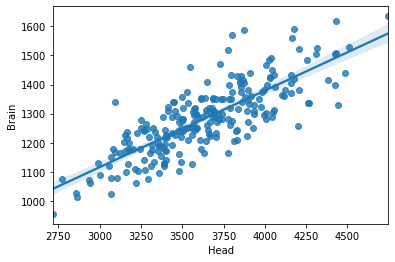

In [23]:
# Task 8

# YOUR CODE HERE
import seaborn as sns
ax = sns.regplot(x = 'Head', y='Brain', data = df)

**Task 9** - Correlation (short answer)

Does it seem plausible that larger head size causes greater brain weight?  Or is it possible that something else causes differences in both of those factors?

ANSWER:

It could be true that in some cases a larger head size could cause greater brain weight. However, it is also very possible that neuron density or something similar to that could cause the changes in weight instead of the head size and that head size really has nothing to do with brain weight.



## Part B

### Sleep Data

Use the following information to answer Tasks 9 - 16 in the rest of this project:

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables for a selection of mammal species. This data is available in the Sleep.csv dataset; the URL is provided below. 

(*Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.*)

**Data Dictionary:**

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



**Task 10**

Before we can look at the data, we need to load in the data. The URL has been provided.

* load in the CSV file as a DataFrame and assign it to the variable `df_sleep`
* make sure to view the DataFrame!

In [25]:
# Task 10

data_url_2 = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

# YOUR CODE HERE
df_sleep = pd.read_csv(data_url_2)

# Print out your DataFrame
df_sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


**Task 10 - Test**

In [26]:
# Task 10 - Test

assert isinstance(df_sleep, pd.DataFrame), 'Have you created a DataFrame named `df_sleep`?'
assert len(df_sleep) == 42


**Task 11** - Plot to check for linearity

Plot the relationship between *gestation time* and time spent in *dreaming sleep*. This plot will not be autograded.

* you can use `seaborn` for your plot, with the `regplot()`
* include the regression line but turn off the confidence interval (`ci=None`)

Describe the relationship between the two variables you plotted below.

ANSWER:

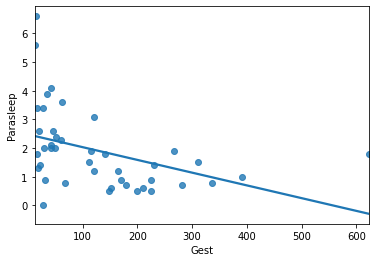

In [27]:
# Task 11

# YOUR CODE HERE
ax1 = sns.regplot(x='Gest', y='Parasleep', data = df_sleep, ci=None)

**Task 12** - Transform a variable

Let's try something new: taking the log of a variable to transform it. Then we'll look at the relationship between the log of that variable and the other variable (which will remain the same)

* Create a new variable with the log of gestational time and add it as a column to `df_sleep` with the name `log_gest` 

*Hint: use the natural log `np.log()`*

In [28]:
# Task 12

# YOUR CODE HERE
df_sleep['log_gest'] = np.log(df_sleep['Gest'])

# Look at your new column
df_sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,log_gest
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,3.737670
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,6.436150
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,5.192957
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,3.555348
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,5.971262


**Task 12 - Test**

In [ ]:
# Task 12 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 13** - Plot a new relationship!

Plot the relationship of the log of *gestational time* and *dreaming sleep*. This plot will not be autograded.

* you can use `seaborn` for your plot, with the `regplot()`
* include the regression line but turn off the confidence interval (`ci=None`)

Describe the relationship of the two variables you just plotted.

ANSWER:

Roughly speaking, as gest sleep increases, parasleep decreases.

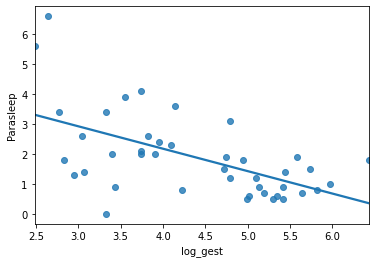

In [29]:
# Task 13

# YOUR CODE HERE
ax1 = sns.regplot(x='log_gest', y='Parasleep', data = df_sleep, ci=None)


**Task 14** - Model the sleep data

Next, create a model the relationship of the log of gestation time and dreaming sleep using the `statsmodels.formula.api`. Remember that `statsmodels` import was made earlier.

* fit a OLS model and assign it to the variable `model_sleep` (remember to enter the model in the format Y ~ X)

In [38]:
# Task 14

# YOUR CODE HERE
model_sleep = ols('Parasleep ~ log_gest', data=df_sleep).fit()

# Print the model summary
print(model_sleep.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     19.49
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           7.48e-05
Time:                        21:53:45   Log-Likelihood:                -64.550
No. Observations:                  42   AIC:                             133.1
Df Residuals:                      40   BIC:                             136.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1762      0.763      6.782      0.0

**Task 14**

In [ ]:
# Task 14 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 15** - Statistical significance of sleep data (short answer)

Is the *log of gestational time* statistically significantly associated with time spent in *dreaming sleep* at the alpha = 0.05 level?

ANSWER:

Yes, since our p value is less that 0.05 which means we would reject the null hypothesis that they are not related.

**Task 16** - Predicting dreaming sleep from gestation time

The final task! Using the model we just created, predict the amount of dreaming sleep for a mammal that gestates her young for 262 days.

* assign the gestation time to the variable `x_predict`
* use the slope and intercept from your `model_sleep` to complete the calculation
* assign the predicted sleep value to `sleep_predict`


In [40]:
model_sleep.params

Intercept    5.176249
log_gest    -0.748942
dtype: float64

In [45]:
# Task 16

# YOUR CODE HERE
ln_x_predict= np.log(262)
sleep_predict = 5.176249 + (-0.748942 * ln_x_predict)

# Print out the log of x and the predicted sleep value
print('ln 262 = ', ln_x_predict)
print('Predicted dreaming sleep = ', sleep_predict)


ln 262 =  5.568344503761097
Predicted dreaming sleep =  1.0058819306641569


**Task 16 Test**

In [ ]:
# Task 16

assert ln_x_predict == np.log(x_predict), 'Did you use the correct log calculation?'



## Portfolio Project Assignment

Write your blog post.  Complete everything - code, visualizations, etc.